# Analiza najbolj dragocenih nogometašev

Na tej datoteki bo potekala analiza o najbolj dragocenih nogometašev, pridobljenih s pomočjo datoteke *Transfermarkt.py*.

Analizirali bomo:
* Nogometne pozicije;
* Starostne skupine;
* Vrednost klubov;
* Države

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from IPython.display import display

In [53]:
pd.options.display.max_rows = 20

In [54]:
osnovni_podatki = pd.read_csv("podatki/nogometasi.csv")

### Top 10

In [55]:
top10 = osnovni_podatki.sort_values('stevilna_cena_eur', ascending=False).head(10)
print("\n🏆 10 najvrednejših igralcev:")
top10[['ime', 'stevilna_cena_eur', 'pozicija', 'drzava_1']]


🏆 10 najvrednejših igralcev:


,ime,stevilna_cena_eur,pozicija,drzava_1
0,Lamine Yamal,20000000000,Right Winger,Spain
2,Erling Haaland,18000000000,Centre-Forward,Norway
3,Kylian Mbappé,18000000000,Centre-Forward,France
1,Jude Bellingham,18000000000,Attacking Midfield,England
4,Vinicius Junior,17000000000,Left Winger,Brazil
5,Bukayo Saka,15000000000,Right Winger,England
8,Jamal Musiala,14000000000,Attacking Midfield,Germany
7,Florian Wirtz,14000000000,Attacking Midfield,Germany
6,Pedri,14000000000,Central Midfield,Spain
9,Federico Valverde,13000000000,Central Midfield,Uruguay


## Analiza o pozicijah

Analiza o pozicijah bo potekala na dva načina. Za začetek bomo razdelili igralce po nogometnih pozicijah in opazili, katera pozicija se največkrat pojavlja. Domnevam, da se bo največkrat pojavila neka pozicija, ki lahko prekriva več nogometnih postavitev na primer osrednji vezist (*'Central Midfield'* v angleščini). Prav tako pa mislim, da pozicija, ki se bo pojavila manjkrat bo golman (*'Goalkeeper'* v angleščini), saj pri vsaki postavi zavzema le eno mesto.

In [56]:
# Sešteje igralce po pozicijah
igralci_po_pozicijah = (
    osnovni_podatki['pozicija']
    .value_counts()
    .reset_index()
)

igralci_po_pozicijah.columns = ["Pozicija", "Število igralcev"]

print("👥 Število igralcev po pozicijah:")
igralci_po_pozicijah

👥 Število igralcev po pozicijah:


,Pozicija,Število igralcev
0,Centre-Back,95
1,Centre-Forward,77
2,Central Midfield,63
3,Right Winger,56
4,Left Winger,46
5,Attacking Midfield,46
6,Defensive Midfield,42
7,Left-Back,29
8,Right-Back,24
9,Goalkeeper,16


Domneva je bila skoraj pravilna, saj pozicije, kot desni ali levi vezist se pojavijo bistveno manjkrat. To zato, ker večina teh pozicij v nogometnih postavah prekrivajo bolj napadalne ali obrambne pozicije, kot so bočni branilci ali krila. Hkrati smo s to analizo videli, da nastopa več napadalnih pozicij kot pa obrambnih.

Zdaj bi radi opazili, katera pozicija je najbolj vredna. Mislim, da bojo to bolj napadalne pozicije, kajti domnevam, da zabijanje golov bolj vpliva na vrednost nogometaša.

In [57]:
if osnovni_podatki['stevilna_cena_eur'].median() > 1e8:
    osnovni_podatki['stevilna_cena_eur'] = osnovni_podatki['stevilna_cena_eur'] / 100

povprecje_pozicija = (
    osnovni_podatki
    .groupby('pozicija')['stevilna_cena_eur']
    .mean()
    .sort_values(ascending=False)
    .round(2) / 1_000_000
)

print("\n📈 Povprečna vrednost po pozicijah:")
povprecje_pozicija.astype(str) + "M"

povprecje_pozicija = povprecje_pozicija.reset_index()
povprecje_pozicija.columns = ['Pozicija', 'Povprečna vrednost']
povprecje_pozicija['Povprečna vrednost'] = povprecje_pozicija['Povprečna vrednost'].map("{:,.2f}M".format)

povprecje_pozicija


📈 Povprečna vrednost po pozicijah:


,Pozicija,Povprečna vrednost
0,Second Striker,48.33M
1,Attacking Midfield,47.11M
2,Right Winger,45.00M
3,Central Midfield,43.06M
4,Centre-Forward,42.58M
5,Left Winger,42.02M
6,Defensive Midfield,39.57M
7,Right-Back,37.29M
8,Left-Back,36.48M
9,Centre-Back,35.39M


Zdaj bi radi primerjali ti dve analizi. Za začetek združimo tabeli in naredimo graf, da bo vse bolj opazno.


📊 Združena tabela (število igralcev + povprečna vrednost):


,Pozicija,Število igralcev,Povprečna vrednost
0,Centre-Back,95,35.39
1,Centre-Forward,77,42.58
2,Central Midfield,63,43.06
3,Right Winger,56,45.00
4,Left Winger,46,42.02
5,Attacking Midfield,46,47.11
6,Defensive Midfield,42,39.57
7,Left-Back,29,36.48
8,Right-Back,24,37.29
9,Goalkeeper,16,30.31


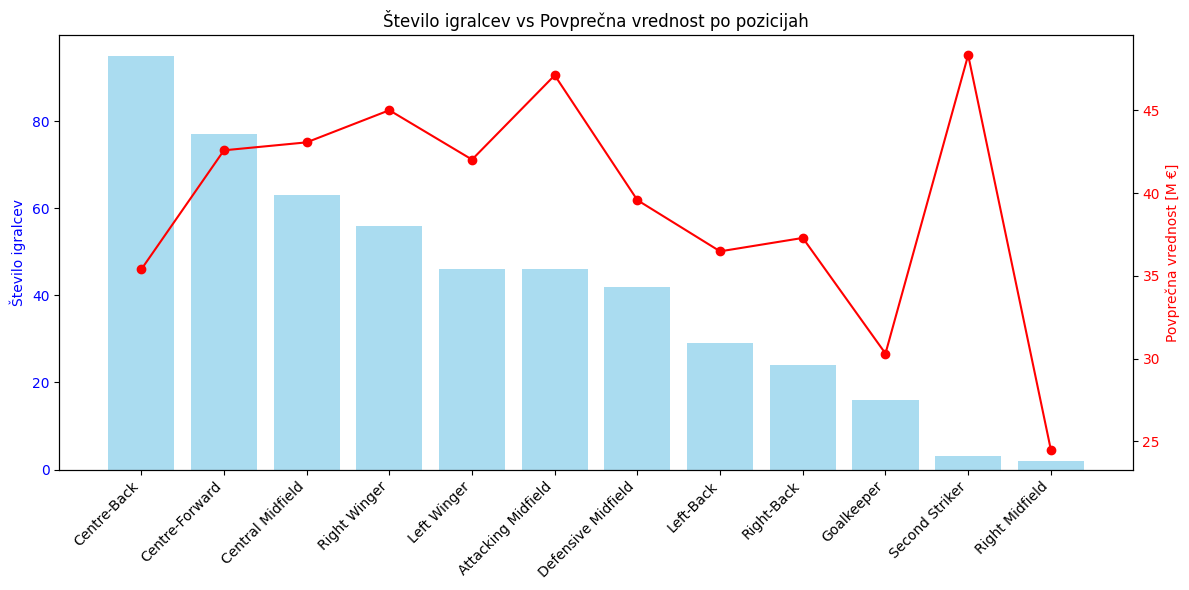

In [58]:
povprecje_pozicija_num = (
    osnovni_podatki
    .groupby('pozicija')['stevilna_cena_eur']
    .mean()
    .reset_index()
)

povprecje_pozicija_num.columns = ['Pozicija', 'Povprečna vrednost']
povprecje_pozicija_num['Povprečna vrednost'] = (povprecje_pozicija_num['Povprečna vrednost'] / 1_000_000).round(2)

primerjava = igralci_po_pozicijah.merge(povprecje_pozicija_num, on='Pozicija')

primerjava['Povprečna vrednost'] = primerjava['Povprečna vrednost'].astype(float)

print("\n📊 Združena tabela (število igralcev + povprečna vrednost):")
display(primerjava)

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.bar(primerjava['Pozicija'], primerjava['Število igralcev'], color="skyblue", alpha=0.7, label="Število igralcev")
ax1.set_ylabel("Število igralcev", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

plt.xticks(rotation=45, ha="right")

ax2 = ax1.twinx()
ax2.plot(primerjava['Pozicija'], primerjava['Povprečna vrednost'], color="red", marker="o", label="Povprečna vrednost [M €]")
ax2.set_ylabel("Povprečna vrednost [M €]", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("Število igralcev vs Povprečna vrednost po pozicijah")
fig.tight_layout()
plt.show()

Kot smo domnevali, veliko napadalcev imajo hkrati tudi visoko vrednost, medtem ko čeprav je največ osrednjih branicev, nimajo tako velike vrednosti kot napadalci.

## Analiza o starosti

Zdaj bi radi analizirali igralce po starosti in za lažjo analizo bom razdelil igralce na štiri starostne skupine:
* na dvajsetletnike ali mlajše igralce;
* igralce med 21. in 25. letom;
* igralce med 26. in 30. letom ter
* igralce, ki imajo več kot 30 let.

Za začetek bi spet radi opazili, koliko igralcev nastopa v teh kategorijah. Domnevam, da bo več igralcev v drugi starostni skupini, oziroma med 26. in 30. letom, saj so verjetno na vrhu njihovih karier. Po drgui strani pa mislim, da bo manj igralcev starih več kot 30, kajti nekateri igralci pri tej starosti že nehajo igrati.

In [59]:
bins = [0, 20, 25, 30, 100]
labels = ["≤20", "21–25", "26–30", "31+"]

osnovni_podatki['starostna_skupina'] = pd.cut(osnovni_podatki['starost'], bins=bins, labels=labels, right=True)

starostna_porazdelitev = osnovni_podatki['starostna_skupina'].value_counts().reindex(labels)

starostna_porazdelitev = starostna_porazdelitev.reset_index()
starostna_porazdelitev.columns = ['Starostna skupina', 'Število igralcev']

print("👥 Število igralcev po starostnih skupinah:")
starostna_porazdelitev

👥 Število igralcev po starostnih skupinah:


,Starostna skupina,Število igralcev
0,≤20,49
1,21–25,256
2,26–30,185
3,31+,9


Domneva je bila večinoma pravilna. Lahko si naredimo tudi diagram, da bo razlika bolj opazna.

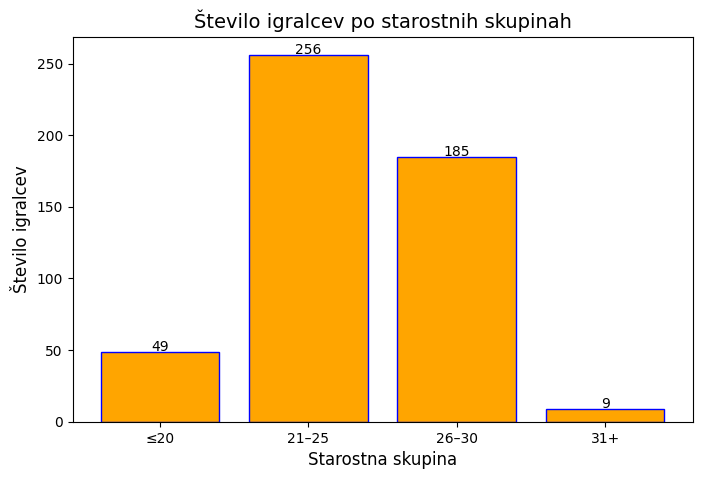

In [60]:
plt.figure(figsize=(8,5))

x_labels = starostna_porazdelitev['Starostna skupina'].astype(str).tolist()
y_values = starostna_porazdelitev['Število igralcev'].tolist()

plt.bar(x_labels, y_values, color="orange", edgecolor="blue")

plt.title("Število igralcev po starostnih skupinah", fontsize=14)
plt.xlabel("Starostna skupina", fontsize=12)
plt.ylabel("Število igralcev", fontsize=12)

for i, val in enumerate(y_values):
    plt.text(i, val + 0.5, str(val), ha='center', fontsize=10)

plt.show()

Zdaj bi pa še preverili povprečno vrednost igralcev neke starostne skupine. Po zelo podobnih razmislekih kot za starostno porazdelitev domnevamo, da bojo mlajši igralci bolj vredni, kajti njihova nogometna kariera se ne bo kmalu končala.

In [61]:
if osnovni_podatki['stevilna_cena_eur'].median() > 1e8:
    osnovni_podatki['stevilna_cena_eur'] = osnovni_podatki['stevilna_cena_eur'] / 100

povprecje_starost = (
    osnovni_podatki
    .groupby("starostna_skupina", observed=False)["stevilna_cena_eur"]
    .mean()
    .sort_values(ascending=False)
    .round(2) / 1_000_000
)

print("\n🍰 Povprečna vrednost po starostni skupini:")
povprecje_starost.astype(str) + "M"

povprecje_starost = povprecje_starost.reset_index()
povprecje_starost.columns = ["Starostna skupina", "Povprečna vrednost"]
povprecje_starost["Povprečna vrednost"] = povprecje_starost["Povprečna vrednost"].map("{:,.2f}M".format)

povprecje_starost


🍰 Povprečna vrednost po starostni skupini:


,Starostna skupina,Povprečna vrednost
0,21–25,41.49M
1,≤20,40.00M
2,26–30,39.81M
3,31+,35.89M


Zdaj pa obe analizi še bolj vidno opazimo z grafom:

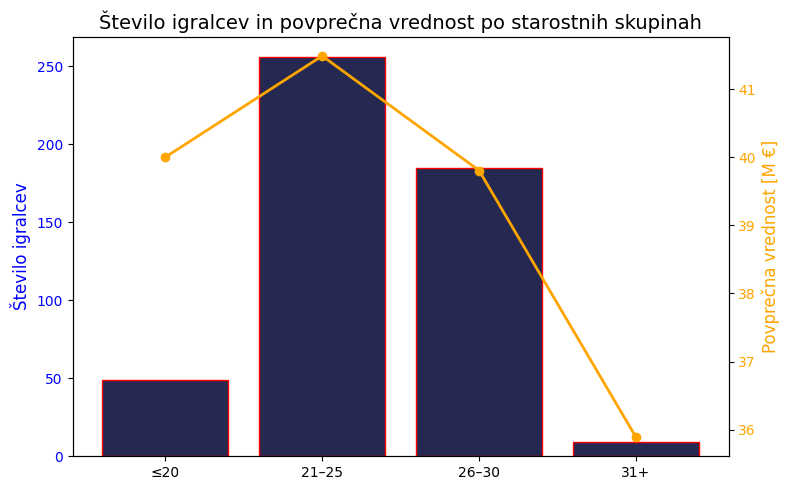

In [62]:
igralci_po_starosti = (
    osnovni_podatki['starostna_skupina']
    .value_counts()
    .reindex(["≤20", "21–25", "26–30", "31+"])
    .reset_index()
)
igralci_po_starosti.columns = ['Starostna skupina', 'Število igralcev']

povprecje_starost = (
    osnovni_podatki
    .groupby("starostna_skupina", observed=False)['stevilna_cena_eur']
    .mean()
    .reindex(["≤20", "21–25", "26–30", "31+"])
    .round(2) / 1_000_000
).reset_index()
povprecje_starost.columns = ['Starostna skupina', 'Povprečna vrednost']

starostna_tabela = igralci_po_starosti.merge(povprecje_starost, on='Starostna skupina')

fig, ax1 = plt.subplots(figsize=(8,5))

ax1.bar(starostna_tabela['Starostna skupina'], starostna_tabela['Število igralcev'],
        color='#252850', edgecolor='red', label='Število igralcev')
ax1.set_ylabel('Število igralcev', fontsize=12, color='blue')
ax1.tick_params(axis="y", labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(starostna_tabela['Starostna skupina'], starostna_tabela['Povprečna vrednost'],
        color='orange', marker="o", linewidth=2, label='Povprečna vrednost [M €]')
ax2.set_ylabel('Povprečna vrednost [M €]', fontsize=12, color='orange')
ax2.tick_params(axis="y", labelcolor='orange')

plt.title("Število igralcev in povprečna vrednost po starostnih skupinah", fontsize=14)
fig.tight_layout()
plt.show()

## Analiza o klubih

Zdaj si pa analizirajmo še malo nogometne klube. Za začetek si poglejmo 10 najbolj vrednejše klube.

Opomba! Vrednost klubov ni popolna, kajti podatki so bili podbrani le od petstotih najbolj dragocenih igralcev, tako da ni nujno da so vsi igralci nekega kluba tudi v tej analizi.

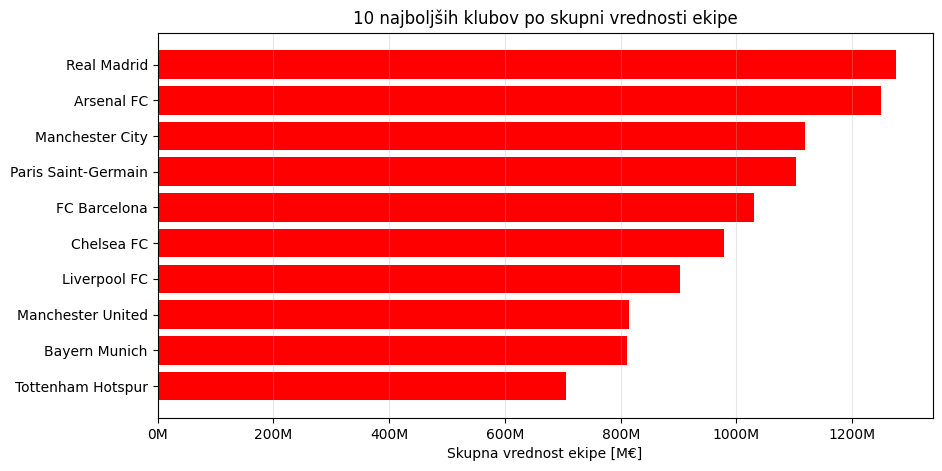

In [63]:
club_value = (
    osnovni_podatki.groupby("klub")["stevilna_cena_eur"]
    .sum()
    .sort_values(ascending=False)
    .head(10) / 1_000_000
).round(2)

plt.figure(figsize=(10, 5))
plt.barh(club_value.index, club_value.values, color="red")
plt.title("10 najboljših klubov po skupni vrednosti ekipe")
plt.xlabel("Skupna vrednost ekipe [M€]")
plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0fM'))
plt.gca().invert_yaxis()  # najvrednejši na vrhu
plt.grid(axis="x", alpha=0.3)
plt.show()

Zaenkrat vemo samo vrednost prvih deset klubov, poglejmo torej še ostale.

In [64]:
vrednost_ekip = (
    osnovni_podatki.groupby('klub')['stevilna_cena_eur'].sum().sort_values(ascending=False) / 1_000_000
).round(2)

tabela_ekip = vrednost_ekip.reset_index()
tabela_ekip.columns = ['Klub', 'Skupna vrednost [M €]']

tabela_ekip['Ranking'] = range(1, len(tabela_ekip) + 1)

print("💰 Vrednost klubov:")
tabela_ekip

💰 Vrednost klubov:


,Klub,Skupna vrednost [M €],Ranking
0,Real Madrid,1275.0,1
1,Arsenal FC,1249.0,2
2,Manchester City,1118.0,3
3,Paris Saint-Germain,1102.0,4
4,FC Barcelona,1030.0,5
...,...,...,...
75,FC Augsburg,22.0,76
76,Sport Club Corinthians Paulista,22.0,77
77,SC Braga,22.0,78
78,KRC Genk,20.0,79


Zdaj ko vemo koliko so klubi vredni, bi še radi pogledali, koliko igralcev nastopa v tem klubu. Verjetno bojo klubi z večjo vrednost tudi vsebovali več igralcev.

In [65]:
stevilo_igralcev_v_klubu = (
    osnovni_podatki.groupby('klub')['ime'].count().sort_values(ascending=False)
)

tabela_igralci_v_klubu = stevilo_igralcev_v_klubu.reset_index()
tabela_igralci_v_klubu.columns = ['Klub', 'Število igralcev']

print("👥 Število igralcev v klubu:")
tabela_igralci_v_klubu

👥 Število igralcev v klubu:


,Klub,Število igralcev
0,Arsenal FC,22
1,Chelsea FC,21
2,Paris Saint-Germain,20
3,Manchester City,20
4,Manchester United,20
...,...,...
75,Leicester City,1
76,Sport Club Corinthians Paulista,1
77,Sociedade Esportiva Palmeiras,1
78,Shakhtar Donetsk,1


Da bo razmerje bolj opazno si pa poglejmo še graf:

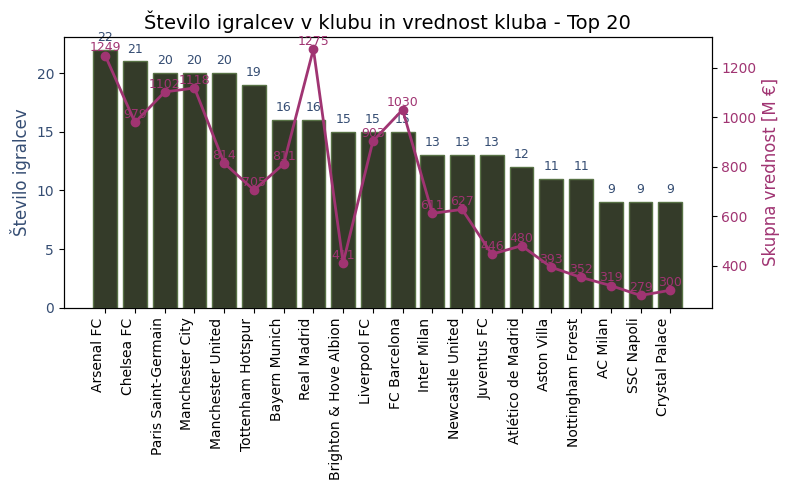

In [66]:
klubna_tabela = tabela_igralci_v_klubu.merge(tabela_ekip, on='Klub').head(20)

fig, ax1 = plt.subplots(figsize=(8,5))

bars = ax1.bar(klubna_tabela['Klub'], klubna_tabela['Število igralcev'],
        color='#343B29', edgecolor='#587246', label='Število igralcev')
ax1.set_ylabel('Število igralcev', fontsize=12, color='#354D73')
ax1.tick_params(axis="y", labelcolor='#354D73')

plt.xticks(rotation=90, ha="right")

for bar in bars:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width()/2, height + 0.5,
        str(height), ha='center', va='bottom', fontsize=9, color='#354D73'
    )

ax2 = ax1.twinx()
line = ax2.plot(klubna_tabela['Klub'], klubna_tabela['Skupna vrednost [M €]'],
        color='#A03472', marker="o", linewidth=2, label='Skupna vrednost [M €]')
ax2.set_ylabel('Skupna vrednost [M €]', fontsize=12, color='#A03472')
ax2.tick_params(axis="y", labelcolor='#A03472')

for i, val in enumerate(klubna_tabela['Skupna vrednost [M €]']):
    ax2.text(
        i, val + 5, f"{val:.0f}",
        ha='center', va='bottom', fontsize=9, color='#A03472'
    )

plt.title("Število igralcev v klubu in vrednost kluba - Top 20", fontsize=14)
fig.tight_layout()
plt.show()

Domnevali smo večinoma prav, kajti oba grafa padata. Lahko pa opazimo, da je graf, ki prikazuje vrednost bistveno narastel pri klubih kot so *Real Madrid* in *FC Barcelona*. To zato, ker imajo igralce z zelo visoko vrednost kot na primer *Yamal* ali *Bellingham*.

Zdaj lahko sestavimo funkcijo, ki vrne tabelo najvrednejših igralcev z globalnim in klubskim rankingom nekega poljubnega kluba. Tako nam bo bolj jasna vrednost kluba. 

In [73]:
def pregled_kluba(podatki, klub, top_n=None):
    """
    Vrne tabelo najvrednejših igralcev z globalnim in klubskim rankingom.
    
    Parametri:
        podatki (DataFrame): Vsi podatki o igralcih
        klub (str): ime kluba
        top_n (int | None): število igralcev za prikaz (če None, prikaže vse)
    """
    
    if klub not in podatki['klub'].unique():
        return f"⚠️ Kluba '{klub}' ni mogoče najti v naboru podatkov."
    
    # --- Vrednost ekipe ---
    klub_vrednost = podatki.groupby('klub')['stevilna_cena_eur'].sum().sort_values(ascending=False)
    
    skupna_vrednost = klub_vrednost[klub]
    global_rank = (klub_vrednost.index == klub).argmax() + 1  # najdi položaj
    klubi = len(klub_vrednost)
    
    print(f"\n🏟️ {klub}: {skupna_vrednost/1_000_000:.2f}M € "
          f"(Rank {global_rank}/{klubi})")
    
    # --- Ranking igralcev ---
    podatki = podatki.copy()
    podatki['global rank'] = podatki['stevilna_cena_eur'].rank(method="min", ascending=False).astype(int)
    podatki['klub rank'] = podatki.groupby('klub')['stevilna_cena_eur'].rank(method="min", ascending=False).astype(int)
    
    igralci_kluba = (
        podatki[podatki['klub'] == klub]
        .sort_values('stevilna_cena_eur', ascending=False)
        .head(top_n)
        .copy()
    )
    igralci_kluba['vrednost M €'] = (igralci_kluba['stevilna_cena_eur'] / 1_000_000).round(2)
    
    return igralci_kluba[[
        'ime', 'pozicija', 'drzava_1',
        'vrednost M €', 'klub rank', 'global rank'
    ]]

Poglejmo si zdaj bolj podrobno eden od najboljših italijanskih klubov, oziroma *Juventus FC*.

In [74]:
pregled_kluba(osnovni_podatki, 'Juventus FC')


🏟️ Juventus FC: 446.00M € (Rank 14/80)


,ime,pozicija,drzava_1,vrednost M €,klub rank,global rank
87,Kenan Yıldız,Left Winger,Türkiye,50.0,1,87
98,Bremer,Centre-Back,Brazil,50.0,1,87
132,Jonathan David,Centre-Forward,Canada,45.0,3,119
170,Khéphren Thuram,Central Midfield,France,40.0,4,147
213,Andrea Cambiaso,Left-Back,Italy,35.0,5,191
223,Dušan Vlahović,Centre-Forward,Serbia,35.0,5,191
222,Teun Koopmeiners,Attacking Midfield,Netherlands,35.0,5,191
305,Manuel Locatelli,Defensive Midfield,Italy,30.0,8,255
321,Pierre Kalulu,Centre-Back,France,28.0,9,311
324,Francisco Conceição,Right Winger,Portugal,28.0,9,311



🏟️ Juventus FC: 446.00M € (Rank 14/80)


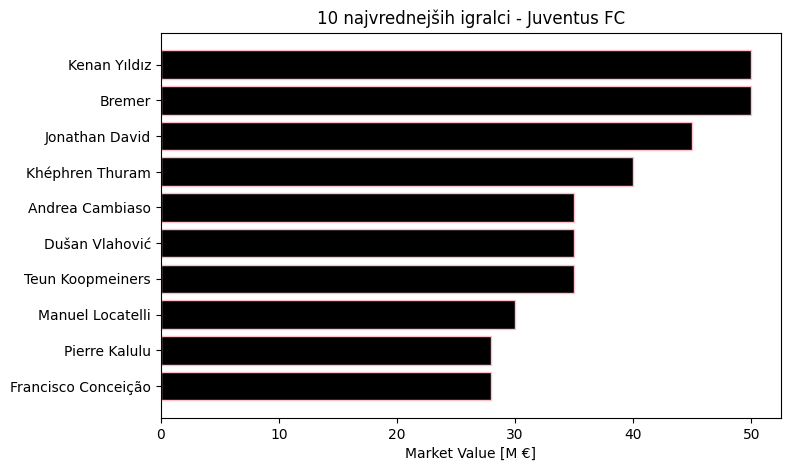

In [77]:
juve = pregled_kluba(osnovni_podatki, "Juventus FC", top_n=10)
plt.figure(figsize=(8, 5))
plt.barh(juve['ime'], juve['vrednost M €'], 
         color="black", edgecolor="pink")
plt.gca().invert_yaxis()  # highest value on top
plt.xlabel("Market Value [M €]")
plt.title("10 najvrednejših igralci - Juventus FC")
plt.show()